In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.optimize import minimize

In [2]:
def data_deal(data):
    F1 = []
    F2 = []
    F3 = []
    F4 = []
    F5 = []
    F6 = []
    for i in range(len(data)):
        F1.append(np.log(data[i,1]))
        F2.append(np.log(max(data[i,4:])))
        F3.append(data[i,0])
        F4.append(data[i,0]*np.log(data[i,1]))
        F5.append(data[i,0]*np.log(max(data[i,4:])))
        F6.append(np.log(data[i,2]))
    result=np.vstack((F1,F2,F3,F4,F5,F6)).T
    result = pd.DataFrame(result,columns=['lnf','lnB','T','Tlnf','TlnB','lny'])
    return result
def ridge(data, model=None):
    # 模型预测
    if model:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(data)
        y_pred = model.predict(X_train_scaled)
        lny_pre = np.array(y_pred).reshape(-1,1)
        y_pre = np.exp(lny_pre)
        return lny_pre
    
    X = data.drop('lny', axis=1)
    y = data['lny']

    # 特征标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X)
    
    # 创建岭回归模型并训练
    ridge_model = Ridge(alpha=1.0)  # alpha 是正则化参数，可以根据需要调整
    ridge_model.fit(X_train_scaled, y)
    
    # 进行预测
    y_pred = ridge_model.predict(X_train_scaled)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error: {mse:.4f} R-squared: {r2:.4f}")
    coefficients = ridge_model.coef_
    intercept = ridge_model.intercept_
    feature_names = X.columns
    regression_equation = f"y = {intercept:.4f}"
    for coef, name in zip(coefficients, feature_names):
        if name == 'feature1_feature3':
            regression_equation += f" + {coef:.4f} * {feature1.name}*{feature3.name}"
        elif name == 'feature2_feature3':
            regression_equation += f" + {coef:.4f} * {feature2.name}*{feature3.name}"
        else:
            regression_equation += f" + {coef:.4f} * {name}"
    print("Regression Equation:", regression_equation)
    lny_true = np.array(y).reshape(-1,1)
    lny_pre = np.array(y_pred).reshape(-1,1)
    y_true = np.exp(lny_true)
    y_pre = np.exp(lny_pre)
    return lny_true, lny_pre, ridge_model

In [3]:
file = open(r'E:\Users\OneDrive\桌面\data1.csv','rb')
data=pd.read_csv(file)
file.close()
data1=np.array(data)
material1 = np.ones((len(data1),1))
file = open(r'E:\Users\OneDrive\桌面\data2.csv','rb')
data=pd.read_csv(file)
file.close()
data2=np.array(data)
material2 = np.ones((len(data2),1)) * 2
file = open(r'E:\Users\OneDrive\桌面\data3.csv','rb')
data=pd.read_csv(file)
file.close()
data3=np.array(data)
material3 = np.ones((len(data3),1)) * 3
file = open(r'E:\Users\OneDrive\桌面\data4.csv','rb')
data=pd.read_csv(file)
file.close()
data4=np.array(data)
material4 = np.ones((len(data4),1)) * 4
M = np.vstack((material1,material2,material3,material4))
W = np.hstack((data1[:,3],data2[:,3],data3[:,3],data4[:,3])).reshape(-1,1)
data = np.vstack((data1,data2,data3,data4))
X= data_deal(data)
print(X)
lny_true, lny_pre, ridge_model = ridge(X)

             lnf       lnB     T         Tlnf        TlnB        lny
0      10.820378 -3.545693  25.0   270.509453  -88.642324   7.599880
1      10.820178 -3.460337  25.0   270.504455  -86.508422   7.794720
2      10.820178 -3.337245  25.0   270.504455  -83.431120   8.111546
3      10.820178 -3.218490  25.0   270.504455  -80.462258   8.412479
4      10.820378 -3.100479  25.0   270.509453  -77.511974   8.709964
...          ...       ...   ...          ...         ...        ...
12395  12.202014 -3.356211  90.0  1098.181298 -302.058984   9.933284
12396  12.202014 -3.261230  90.0  1098.181298 -293.510668  10.185062
12397  12.202014 -3.018447  90.0  1098.181298 -271.660255  10.741438
12398  12.202014 -2.902441  90.0  1098.181298 -261.219721  11.026111
12399  12.202014 -2.671687  90.0  1098.181298 -240.451843  11.586001

[12400 rows x 6 columns]
Mean Squared Error: 0.1650 R-squared: 0.9543
Regression Equation: y = 10.7182 + 0.8748 * lnf + 2.0354 * lnB + -2.2571 * T + 2.1189 * Tlnf + 0.0436

In [4]:
lnf = np.array(X['lnf']).reshape(-1,1)
lnB = np.array(X['lnB']).reshape(-1,1)
T = np.array(X['T']).reshape(-1,1)
X_train = np.hstack((lny_pre,lnf,lnB,T,M,W))
print(X_train)  # Y^,f,B,T,M,W
print(lny_true)   # Y

[[ 7.78025571 10.8203781  -3.54569295 25.          1.          1.        ]
 [ 7.9808007  10.8201782  -3.46033687 25.          1.          1.        ]
 [ 8.27044577 10.8201782  -3.33724481 25.          1.          1.        ]
 ...
 [10.71005834 12.20201442 -3.01844728 90.          4.          3.        ]
 [10.98673386 12.20201442 -2.90244135 90.          4.          3.        ]
 [11.53708539 12.20201442 -2.67168715 90.          4.          3.        ]]
[[ 7.59987956]
 [ 7.79472011]
 [ 8.11154579]
 ...
 [10.74143811]
 [11.02611069]
 [11.58600109]]


In [5]:
import torch
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        hidden_channle = 100
        self.net = nn.Sequential(
            nn.Linear(6, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, hidden_channle), nn.Tanh(),
            nn.Linear(hidden_channle, 1)
        )

    def forward(self,x):
        out=self.net(x)
        return out.view(-1,1)
def set_learning_rate(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [6]:
if False:
    file_name = 'C:\\Users\\Fan\\JupyterFile\\huawei\\Question4.pkl'
    x_u = torch.tensor(X_train, dtype=torch.float32, requires_grad=True)
    y_u = torch.tensor(lny_true, dtype=torch.float32, requires_grad=True)

    model=MLP()
    loss_fn = nn.MSELoss()  #均方差做损失函数
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4000, gamma=0.5)
    epochs = 50000
    Losses = []
    #model.load_state_dict(torch.load(file_name))
    mu = 1e-8
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pre = model(x_u)
        loss1 = loss_fn(y_pre,y_u)
        loss2 = loss_fn(torch.exp(y_pre),torch.exp(y_u))**0.5
        loss = loss1 + mu * loss2
        loss.backward()
        Losses.append(loss.item())
        if epoch % 2000 ==0:
            print(f"[Epoch {epoch+1}/{epochs}] [loss: {loss.item()}] [loss1: {loss1.item():.4f}] [loss2: {loss2.item():.4f}]")
            torch.save(model.state_dict(), file_name)
        optimizer.step()
        scheduler.step()
        loss1ed = loss1
        loss2ed = loss2
    print(f"训练误差[MSE(lnP): {loss1.item():.4f}] [rMSE(P): {loss2.item():.4f}]")
    plt.plot(Losses)
    plt.show()

In [7]:
if True:
    file_name = 'C:\\Users\\Fan\\JupyterFile\\huawei\\Question4.pkl'
    x_u = torch.tensor(X_train, dtype=torch.float32, requires_grad=True)
    y_u = torch.tensor(lny_true, dtype=torch.float32, requires_grad=True)

    model=MLP()
    loss_fn = nn.MSELoss()  #均方差做损失函数
    model.load_state_dict(torch.load(file_name))
    y_pre = model(x_u)
    mu = 1e-5
    loss1 = loss_fn(y_pre,y_u)
    loss2 = loss_fn(torch.exp(y_pre),torch.exp(y_u))**0.5
    loss = loss1 + mu * loss2
    print(f"训练误差[MSE(lnP): {loss1.item():.4f}] [rMSE(P): {loss2.item():.4f}]")

训练误差[MSE(lnP): 0.0391] [rMSE(P): 33056.0391]


In [8]:
# low model prediction
file = open(r'E:\Users\OneDrive\桌面\Question4_test.csv','rb')
data=pd.read_csv(file)
file.close()
test_data=np.array(data)
test_X= data_deal(test_data)
test_X=test_X.drop('lny',axis=1)
print(test_X)
M = np.array(data['磁芯']).reshape(-1,1)
W = np.array(data['励磁波形']).reshape(-1,1)
def prediciton(test_X, ridge_model, model, M , W):
    test_lny_pre = ridge(test_X, ridge_model)
    # high model prediction
    X_test = np.hstack((test_lny_pre,np.array(test_X['lnf']).reshape(-1,1),np.array(test_X['lnB']).reshape(-1,1),np.array(test_X['T']).reshape(-1,1),M,W))
    X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=True)
    pre = model(X_test)
    e_pre = torch.exp(pre)
    e_pre = e_pre.detach().numpy()
    print('P预测值：',e_pre.reshape(1,-1))
    return e_pre
e_pre = prediciton(test_X, ridge_model, model, M, W)
#file = open(r'E:\Users\OneDrive\桌面\Question4_result.csv','w')
#np.savetxt(file, e_pre, delimiter=',')
#file.close()

           lnf       lnB     T         Tlnf        TlnB
0    10.938805 -2.773583  25.0   273.470125  -69.339576
1    11.283009 -2.776728  25.0   282.075226  -69.418204
2    11.397290 -2.658963  25.0   284.932253  -66.474078
3    11.512425 -2.780206  25.0   287.810633  -69.505161
4    11.512425 -2.544014  25.0   287.810633  -63.600347
..         ...       ...   ...          ...         ...
395  11.858428 -3.365657  90.0  1067.258541 -302.909128
396  11.858428 -2.919437  90.0  1067.258541 -262.749336
397  11.975086 -1.983117  90.0  1077.757733 -178.480559
398  12.088977 -1.986417  90.0  1088.007919 -178.777515
399  12.202014 -4.513276  90.0  1098.181298 -406.194850

[400 rows x 5 columns]
P预测值： [[1.72317520e+04 2.51312754e+04 3.77714023e+04 3.23798027e+04
  5.69968516e+04 1.59281797e+04 2.10707129e+03 1.42303357e+03
  4.23621406e+05 7.09259814e+03 1.76459941e+04 1.72963828e+05
  3.81183789e+03 2.25684399e+03 2.38233535e+04 8.42266418e+02
  1.00607578e+05 2.49468703e+05 1.34527771e+03 4.7

In [9]:
def model_predict(f, B, T, M, W):
    test_X = pd.DataFrame({'lnf':np.array(f),'lnB':np.array(B),'T':np.array(T)},index=[0])
    test_X['Tlnf'] = test_X['T']*test_X['lnf']
    test_X['TlnB'] = test_X['T']*test_X['lnB']
    
    e_pre = prediciton(test_X, ridge_model, model, np.array(M).reshape(-1,1), np.array(W).reshape(-1,1))
    return e_pre.item()
def objective_minimize(params, M, W):
    f, B, T = params
    return model_predict(f, B, T, M, W)

# 目标函数，用于最大化 f * B
def objective_maximize(params, M, W):
    f, B, T = params
    return - (f + B)  # 取负值以进行最小化

# 离散值
M_values = [1, 2, 3, 4]
W_values = [1, 2, 3]

# 初始化最小和最大值
min_y = float('inf')
max_fB = float('-inf')
best_conditions_min_y = None
best_conditions_max_fB = None

# 遍历所有 M 和 W 的组合
for M in M_values:
    for W in W_values:
        initial_guess = [8, -2, 70]  # [f, B, T]

        # 最小化 y
        res_min = minimize(objective_minimize, initial_guess, args=(M, W), bounds=[(5, 15), (-10, 0), (25, 100)])
        
        if res_min.success:
            y_value = res_min.fun
            if y_value < min_y:
                min_y = y_value
                best_conditions_min_y = res_min.x
                best_min_M = M
                best_min_W = W

        # 最大化 lnf + lnB
        res_max = minimize(objective_maximize, initial_guess, args=(M, W), bounds=[(5, 15), (-10, 0), (25, 100)])
        
        if res_max.success:
            fB_value = -res_max.fun
            if fB_value > max_fB:
                max_fB = fB_value
                best_conditions_max_fB = res_max.x
                best_max_M = M
                best_max_W = W

# 输出结果
print("Minimum y:", min_y, "at conditions (f, B, T):", best_conditions_min_y,' (M, W):',best_min_M,best_min_W)
print("Maximum lnf+lnB:", max_fB, "at conditions (f, B, T):", best_conditions_max_fB,' (M, W)',best_max_M,best_max_W)

P预测值： [[1411889.6]]
P预测值： [[1411889.6]]
P预测值： [[1411889.6]]
P预测值： [[1411889.6]]
P预测值： [[1973536.1]]
P预测值： [[1973536.1]]
P预测值： [[1973536.1]]
P预测值： [[1973536.1]]
P预测值： [[1774976.]]
P预测值： [[1774976.]]
P预测值： [[1774976.]]
P预测值： [[1774976.]]
P预测值： [[1058665.2]]
P预测值： [[1058665.2]]
P预测值： [[1058665.2]]
P预测值： [[1058665.2]]
P预测值： [[2292778.8]]
P预测值： [[2292778.8]]
P预测值： [[2292778.8]]
P预测值： [[2292778.8]]
P预测值： [[2008836.5]]
P预测值： [[2008836.5]]
P预测值： [[2008836.5]]
P预测值： [[2008836.5]]
P预测值： [[1316648.5]]
P预测值： [[1316648.5]]
P预测值： [[1316648.5]]
P预测值： [[1316648.5]]
P预测值： [[2474653.8]]
P预测值： [[2474653.8]]
P预测值： [[2474653.8]]
P预测值： [[2474653.8]]
P预测值： [[2149864.8]]
P预测值： [[2149864.8]]
P预测值： [[2149864.8]]
P预测值： [[2149864.8]]
P预测值： [[1367928.4]]
P预测值： [[1367928.4]]
P预测值： [[1367928.4]]
P预测值： [[1367928.4]]
P预测值： [[2331058.]]
P预测值： [[2331058.]]
P预测值： [[2331058.]]
P预测值： [[2331058.]]
P预测值： [[2393875.5]]
P预测值： [[2393875.5]]
P预测值： [[2393875.5]]
P预测值： [[2393875.5]]
Minimum y: 1058665.25 at conditions (f, B, T): [

In [19]:
def combined_objective(params, M, W, alpha=0.5):
    f, B, T = params
    y_value = model_predict(f, B, T, M, W)
    fB_value = f + B
    print('当前P值为：',y_value,'当前f*B为：',np.exp(fB_value))
    # 结合两个目标
    return alpha * y_value - (1 - alpha) * fB_value

# 离散值
M_values = [1, 2, 3, 4]
W_values = [1, 2, 3]

# 初始化最优值
best_value = float('inf')
best_conditions = None

# 遍历所有 M 和 W 的组合
for M in M_values:
    for W in W_values:
        # 初始猜测
        initial_guess = [8, -2, 70]  # [f, B, T]

        res = minimize(combined_objective, initial_guess, args=(M, W), bounds=[(5, 13.5), (-10, -0.5), (20, 100)],method='SLSQP')
        
        if res.success:
            objective_value = res.fun
            if objective_value < best_value:
                best_value = objective_value
                best_conditions = res.x
                best_M = M
                best_W = W
print(f"Best pre: {best_value} at conditions (f, B, T):[{best_conditions}] (M, W):[{best_M} {best_W}]")

P预测值： [[1411889.6]]
当前P值为： 1411889.625 当前f*B为： 403.4287934927351
P预测值： [[1411889.6]]
当前P值为： 1411889.625 当前f*B为： 403.42879950429267
P预测值： [[1411889.6]]
当前P值为： 1411889.625 当前f*B为： 403.42879950429267
P预测值： [[1411889.6]]
当前P值为： 1411889.625 当前f*B为： 403.4287934927351
P预测值： [[1014193.4]]
当前P值为： 1014193.375 当前f*B为： 1096.6331584284585
P预测值： [[1014193.4]]
当前P值为： 1014193.375 当前f*B为： 1096.6331747695663
P预测值： [[1014193.4]]
当前P值为： 1014193.375 当前f*B为： 1096.6331747695663
P预测值： [[1014193.4]]
当前P值为： 1014193.375 当前f*B为： 1096.6331584284585
P预测值： [[97677.6]]
当前P值为： 97677.6015625 当前f*B为： 13359.726829661873
P预测值： [[97677.6]]
当前P值为： 97677.6015625 当前f*B为： 13359.727028737318
P预测值： [[97677.6]]
当前P值为： 97677.6015625 当前f*B为： 13359.72663058643
P预测值： [[97677.6]]
当前P值为： 97677.6015625 当前f*B为： 13359.726829661873
P预测值： [[21954.68]]
当前P值为： 21954.6796875 当前f*B为： 59874.14171519835
P预测值： [[21954.68]]
当前P值为： 21954.6796875 当前f*B为： 59874.14260739259
P预测值： [[21954.68]]
当前P值为： 21954.6796875 当前f*B为： 59874.14082300412
P预测值： [[21954

当前P值为： 1316648.5 当前f*B为： 403.4287934927351
P预测值： [[1316648.5]]
当前P值为： 1316648.5 当前f*B为： 403.42879950429267
P预测值： [[1316648.5]]
当前P值为： 1316648.5 当前f*B为： 403.42879950429267
P预测值： [[1316648.5]]
当前P值为： 1316648.5 当前f*B为： 403.4287934927351
P预测值： [[1066523.9]]
当前P值为： 1066523.875 当前f*B为： 1096.6331584284585
P预测值： [[1066523.9]]
当前P值为： 1066523.875 当前f*B为： 1096.6331747695663
P预测值： [[1066523.9]]
当前P值为： 1066523.875 当前f*B为： 1096.6331747695663
P预测值： [[1066523.9]]
当前P值为： 1066523.875 当前f*B为： 1096.6331584284585
P预测值： [[187035.78]]
当前P值为： 187035.78125 当前f*B为： 13359.726829661873
P预测值： [[187035.78]]
当前P值为： 187035.78125 当前f*B为： 13359.727028737318
P预测值： [[187035.78]]
当前P值为： 187035.78125 当前f*B为： 13359.72663058643
P预测值： [[187035.78]]
当前P值为： 187035.78125 当前f*B为： 13359.726829661873
P预测值： [[33276.26]]
当前P值为： 33276.26171875 当前f*B为： 59874.14171519835
P预测值： [[33276.26]]
当前P值为： 33276.26171875 当前f*B为： 59874.14260739259
P预测值： [[33276.26]]
当前P值为： 33276.26171875 当前f*B为： 59874.14082300412
P预测值： [[33276.26]]
当前P值为： 33276.26

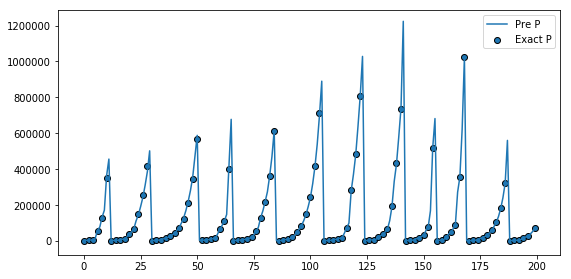

In [11]:
file = open(r'E:\Users\OneDrive\桌面\Question4_result.csv','w')
np.savetxt(file, e_pre, delimiter=',')
file.close()
yyy = model(x_u)
eyyy = torch.exp(yyy).detach().numpy()
plt.figure(figsize=(9, 4.5))
plt.plot(eyyy[:200], label='Pre P')
index=np.linspace(0, 199, 100, dtype=int)
plt.scatter(index,np.exp(lny_true[index]),marker='o',edgecolors='black',label='Exact P')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_u.detach().numpy(), y_pre.detach().numpy())
r2

0.9891604372394471

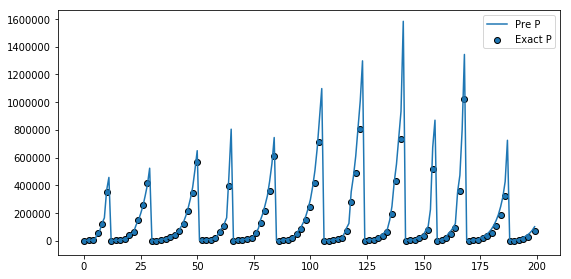

In [13]:
lnyy = ridge(X.drop('lny',axis=1), ridge_model)
eyyyyy = np.exp(lnyy)
plt.figure(figsize=(9, 4.5))
plt.plot(eyyyyy[:200], label='Pre P')
index=np.linspace(0, 199, 100, dtype=int)
plt.scatter(index,np.exp(lny_true[index]),marker='o',edgecolors='black',label='Exact P')
plt.legend()
plt.show()